# 로지스틱 회귀

## 시그모이드 함수

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

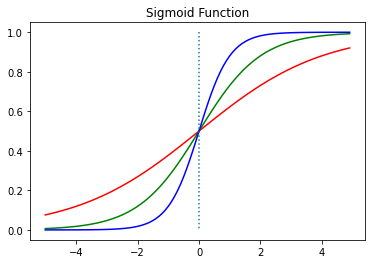

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b')
plt.plot([0, 0], [1, 0], ':') # 가운데 선
plt.title('Sigmoid Function')
plt.show()

## 파이토치로 로지스틱 회귀 구현하기

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

x_train.shape, y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [4]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
H = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
H

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)

In [5]:
H = torch.sigmoid(x_train.matmul(W) + b)
H # 앞선 식과 동일

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [6]:
losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
losses # 모든 원소에 대한 오차

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

In [7]:
cost = losses.mean() # 오차의 평균
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
opt = optim.SGD([W, b], lr=1)

epochs = 10
for epoch in range(epochs + 1):
    H = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H)).mean()
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    print(f'epoch {epoch}/{epochs}, cost: {cost.item()}')

epoch 0/10, cost: 0.6931471824645996
epoch 1/10, cost: 1.0092923641204834
epoch 2/10, cost: 1.410617709159851
epoch 3/10, cost: 2.546337366104126
epoch 4/10, cost: 0.6210732460021973
epoch 5/10, cost: 0.8122705817222595
epoch 6/10, cost: 1.5923551321029663
epoch 7/10, cost: 0.4422001838684082
epoch 8/10, cost: 0.4600818157196045
epoch 9/10, cost: 0.49557098746299744
epoch 10/10, cost: 0.6713531613349915


In [9]:
H = torch.sigmoid(x_train.matmul(W) + b)
H

tensor([[0.0615],
        [0.0480],
        [0.4994],
        [0.2065],
        [0.3715],
        [0.7985]], grad_fn=<SigmoidBackward0>)

In [10]:
pred = H >= torch.FloatTensor([0.5]) # 0.5 이상만 True
pred, W, b

(tensor([[False],
         [False],
         [False],
         [False],
         [False],
         [ True]]),
 tensor([[ 0.8205],
         [-1.0821]], requires_grad=True),
 tensor([-1.3817], requires_grad=True))

# nn.Module로 구현하는 로지스틱 회귀

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential( # 레이어를 쌓는 시퀀셜
    nn.Linear(2, 1),
    nn.Sigmoid()
)

opt = optim.SGD(model.parameters(), lr=1)
epochs = 10
for epoch in range(epochs + 1):
    H = model(x_train)
    cost = F.binary_cross_entropy(H, y_train)
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    pred = H >= torch.FloatTensor([0.5]) # 예측값 0.5 이상 True
    correct_pred = pred.float() == y_train # 실제값과 일치할 때만 True
    acc = correct_pred.sum().item() / len(correct_pred)
    print(f'epoch {epoch}/{epochs}, cost: {cost.item()}, accuracy: {acc:3f}')

epoch 0/10, cost: 0.5397130846977234, accuracy: 0.833333
epoch 1/10, cost: 0.5270015597343445, accuracy: 0.833333
epoch 2/10, cost: 0.6201538443565369, accuracy: 0.500000
epoch 3/10, cost: 1.1884881258010864, accuracy: 0.500000
epoch 4/10, cost: 0.8041677474975586, accuracy: 0.666667
epoch 5/10, cost: 1.632125735282898, accuracy: 0.500000
epoch 6/10, cost: 0.44555047154426575, accuracy: 0.666667
epoch 7/10, cost: 0.47112664580345154, accuracy: 0.833333
epoch 8/10, cost: 0.5224076509475708, accuracy: 0.500000
epoch 9/10, cost: 0.7649615406990051, accuracy: 0.666667
epoch 10/10, cost: 0.6148514747619629, accuracy: 0.666667


In [12]:
model(x_train), list(model.parameters())

(tensor([[0.4539],
         [0.7702],
         [0.9794],
         [0.9921],
         [0.9987],
         [0.9999]], grad_fn=<SigmoidBackward0>),
 [Parameter containing:
  tensor([[ 1.8139, -0.4193]], requires_grad=True),
  Parameter containing:
  tensor([-1.1604], requires_grad=True)])

# 클래스로 파이토치 모델 구현하기

In [13]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [14]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()
opt = optim.SGD(model.parameters(), lr=1)

epochs = 10
for epoch in range(epochs + 1):
    h = model(x_train)
    cost = F.binary_cross_entropy(h, y_train)
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    print(f'epoch {epoch}/{epochs}, cost: {cost.item()}, accuracy: {acc:3f}')

epoch 0/10, cost: 0.6149943470954895, accuracy: 0.666667
epoch 1/10, cost: 0.8097653388977051, accuracy: 0.666667
epoch 2/10, cost: 1.2156200408935547, accuracy: 0.666667
epoch 3/10, cost: 2.2787606716156006, accuracy: 0.666667
epoch 4/10, cost: 0.5576614737510681, accuracy: 0.666667
epoch 5/10, cost: 0.62872314453125, accuracy: 0.666667
epoch 6/10, cost: 0.9388265609741211, accuracy: 0.666667
epoch 7/10, cost: 0.7147286534309387, accuracy: 0.666667
epoch 8/10, cost: 1.116650938987732, accuracy: 0.666667
epoch 9/10, cost: 0.5795651078224182, accuracy: 0.666667
epoch 10/10, cost: 0.7475497126579285, accuracy: 0.666667
